# Pie chart demo 
## Plus beginning legend manipulation

In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt

%matplotlib inline

## Read in the data

*I'm using pandas*

In [2]:
data = pd.read_csv('pie.csv')
data

,Usage,Percent
0,Efficiency of Cognition,5
1,Labels and Legends,6
2,Color Choice,5
3,"Binning, Subsetting, Scoping",7
4,Truncating Axes,10
5,More Data per Dimension,33
6,More Dimension per Data,34


## This is what matplotlib will spit out for a default pie chart (not very useful)

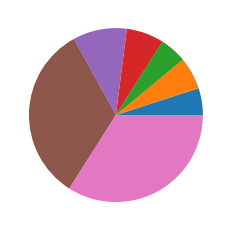

In [3]:
f,ax = plt.subplots()
ax.set_aspect('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
wedges, t1 = ax.pie(data['Percent'])#, shadow=True, radius=2)


## Let's add labels to the plot (we'll improve this later on)

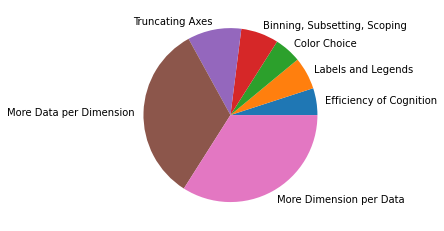

In [4]:
f,ax = plt.subplots()
ax.set_aspect('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
wedges, t1 = ax.pie(data['Percent'], labels=data['Usage'])


## Let's add in the actual percentage values

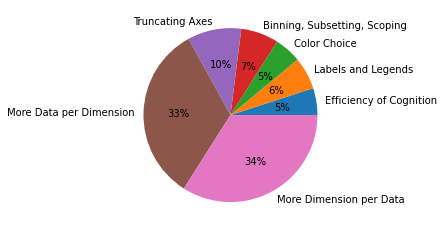

In [5]:
f,ax = plt.subplots()
ax.set_aspect('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
wedges, t1, t2 = ax.pie(data['Percent'], labels=data['Usage'], autopct='%1.0f%%')


## Maybe we'd prefer to have a legend, instead of the labels sticking out of the pie chart. 

*Here's what matplotlib spits out by default*

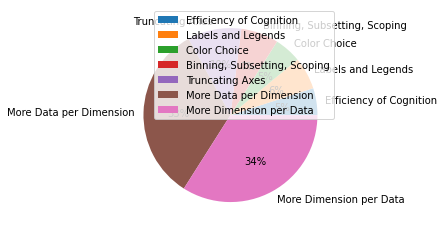

In [6]:
f,ax = plt.subplots()
ax.set_aspect('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
wedges, t1, t2 = ax.pie(data['Percent'], labels=data['Usage'], autopct='%1.0f%%')
ax.legend()

## Let's make this look better.
* Make the font larger 
* Make the plot larger
* Only include the labels in the legend
* Move the legend to a more convenient location

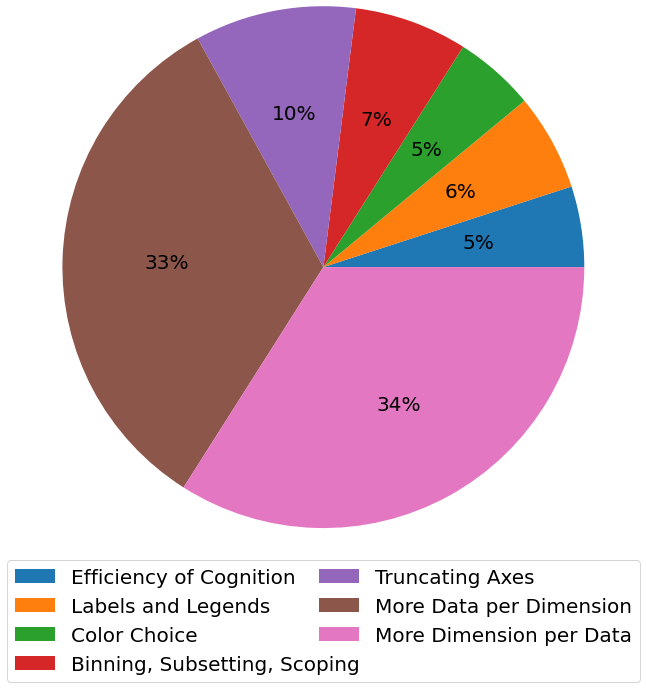

In [7]:
#this will change the font globally, but you could also change the fontsize for each label independently
font = {'size' : 20}
matplotlib.rc('font', **font)

f,ax = plt.subplots()
ax.set_aspect('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
wedges, t1, t2 = ax.pie(data['Percent'], autopct='%1.0f%%', radius = 3)
ax.legend(wedges, data['Usage'], ncol=2, bbox_to_anchor = (-1., -1.3, 3, 0.5), mode='expand')

## A few more improvements
* Rotate the plot a bit
* "Explode" a few of the wedges highlight and group them.  Note that exploding individual wedges is easy, but grouping them takes a little more effort
* Add some black lines to separate the wedges better
* Add a title
* Save the figure as an pdf file

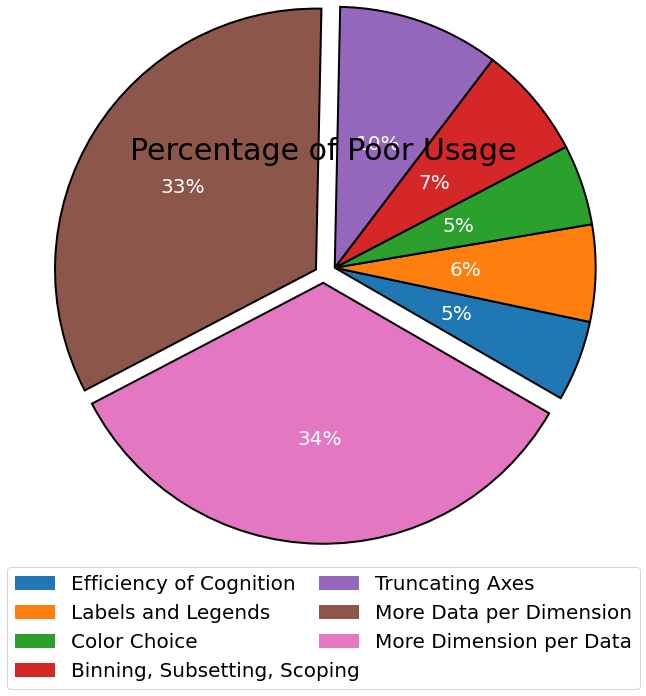

In [14]:
#this will change the font globally, but you could also change the fontsize for each label independently
font = {'size' : 20}
matplotlib.rc('font', **font)

offset = 0.1
f,ax = plt.subplots(figsize=(4,4))
ax.set_aspect('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
wedges, t1, t2 = ax.pie(data['Percent'], autopct='%1.0f%%', radius = 3, explode=(0,0,0,0,0, offset, offset), startangle = -30)
ax.legend(wedges, data['Usage'], ncol=2, bbox_to_anchor = (-1., -1.3, 3, 0.5), mode='expand')

#add a title
ax.set_title('Percentage of Poor Usage', position=(0.5,100), fontsize=30)
#define the group that we want to explode together, and find the angle it subtends
group = [0,1,2,3,4]
theta1 = min([wedges[i].theta1 for i in group])
theta2 = max([wedges[i].theta2 for i in group])
ang = (theta2 + theta1) / 2. * np.pi/180.
for i, (w,t,tn) in enumerate(zip(wedges, t1, t2)):
    #add lines around the wedges
    w.set_linewidth(2)
    w.set_edgecolor('#000000')
    tn.set_color('white')
    #this angle will be used for moving the percentage text
    wang = (w.theta2 + w.theta1) / 2. * np.pi/180.
    if (i in group):
        xoff = offset/2. * w.r * np.cos(ang)
        yoff = offset/2. * w.r * np.sin(ang)
        #move the wedge
        w.set_center( (w.center[0] + xoff, w.center[1] + yoff) )
        #move the text
        tn.set_position( ( 0.5*w.r * np.cos(wang) + xoff, 0.5*w.r * np.sin(wang) + yoff))#

f.savefig('pie.png',bbox_inches = 'tight') #png doesn't show these artifacts even without the silly fix

In [15]:
#this is a silly fix for a lines bleeding out into the center of the figure in the PDF (not sure why python does this -- maybe it's dependent on OS or python version??)
x1 = offset*(0.75 + np.cos(theta1))
y1 = np.sin(theta1) - 0.935
y2 = np.sin(theta1) - 1
ax.plot([x1,x1],[y1,y1 + 0.1], color='white', linewidth=5)
ax.plot([x1,x1 + 0.1],[y1, y2], color='white', linewidth=5)


f.savefig('pie.pdf',format='pdf', bbox_inches = 'tight') 